## HELP-NGO using Clustering 

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Step 1: Understanding the data

In [101]:
# Reading dataset and inspecting various variables.
country = pd.read_csv('Country-data.csv')
country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [24]:
# Inspecting the variable datatypes
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [25]:
# Column wise null values
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [26]:
country.shape

(167, 10)

In [102]:
# Converting variables described as % of 'gdpp' to actual numerical values.
country['exports'] = country['exports'] * country['gdpp'] * 0.01
country['health'] = country['health'] * country['gdpp'] * 0.01
country['imports'] = country['imports'] * country['gdpp'] * 0.01
country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840


In [103]:
# Let's try to look at outliers if present.
country.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


There seem to be some outliers in variables like 'income', 'health', 'gdpp', 'life_expec', 'child_mort', etc.

So, let's investigate further.

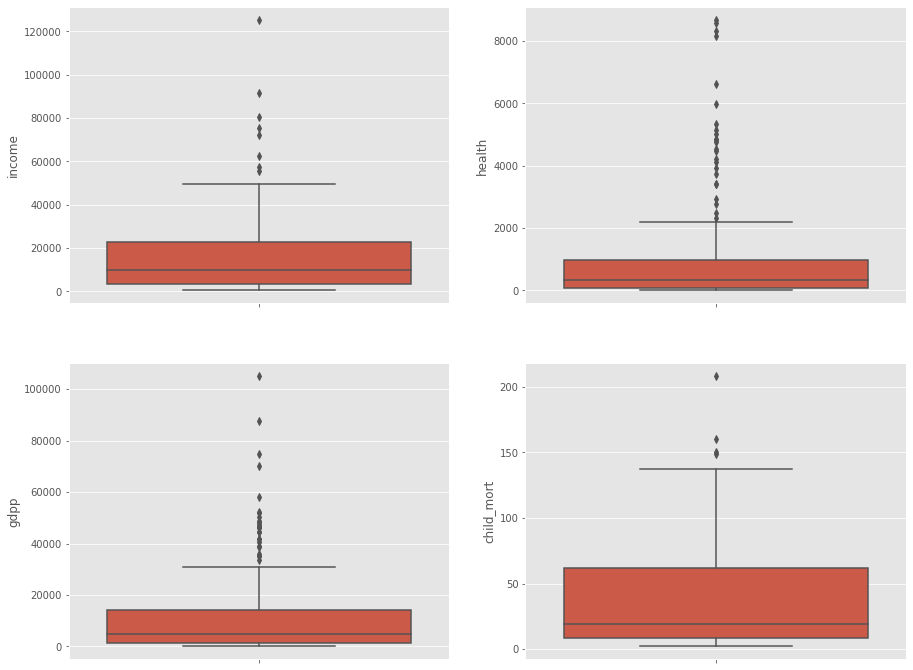

In [104]:
# Plotting the variables with outliers
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(y = 'income', data = country)
plt.subplot(2,2,2)
sns.boxplot(y = 'health', data = country)
plt.subplot(2,2,3)
sns.boxplot(y = 'gdpp', data = country)
plt.subplot(2,2,4)
sns.boxplot(y = 'child_mort', data = country)

Clearly, we can see that there are high outliers. Outliers of important factors such as 'gdpp', 'income' need to be handled.

Most of these outliers are most probably from developed/developing countries. So Let's only cap the very high outliers as removing them might affect the dataset and we might lose some countries.

In [105]:
# Let's treat the high outliers in important variables that construct the basis of the analysis.
Q1 = country.gdpp.quantile(0.05)
Q3 = country.gdpp.quantile(0.95)
#country['gdpp'][country['gdpp']<=Q1]=Q1
country['gdpp'][country['gdpp']>=Q3]=Q3
Q1 = country.income.quantile(0.05)
Q3 = country.income.quantile(0.95)
#country['income'][country['income']<=Q1]=Q1
country['income'][country['income']>=Q3]=Q3
Q1 = country.health.quantile(0.05)
Q3 = country.health.quantile(0.95)
#country['health'][country['health']<=Q1]=Q1
country['health'][country['health']>=Q3]=Q3
country.shape

(167, 10)

In [106]:
country.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,954.012480,6588.352108,15738.760479,7.781832,70.555689,2.947964,11998.826347
std,40.328931,17973.885795,1453.426636,14710.810418,14787.154215,10.570704,8.893172,1.513848,15158.213199
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4931.330700,24241.560000,47513.000000,20.870000,81.400000,5.861000,48547.000000
99%,153.400000,64794.260000,4966.701000,55371.390000,48290.000000,41.478000,82.370000,6.563600,48610.000000


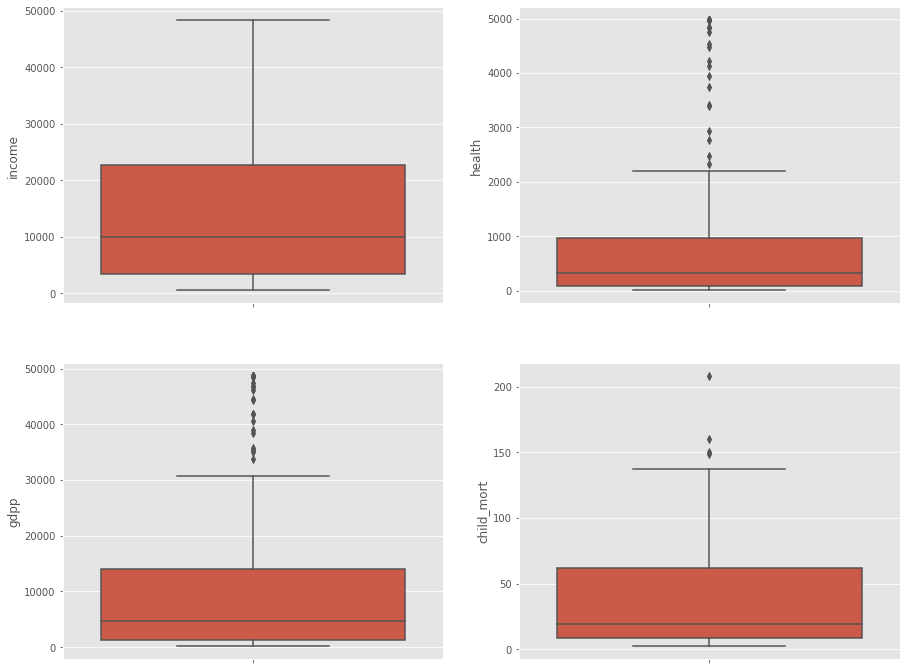

In [107]:
# Plotting the variables again after outlier treatment
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(y = 'income', data = country)
plt.subplot(2,2,2)
sns.boxplot(y = 'health', data = country)
plt.subplot(2,2,3)
sns.boxplot(y = 'gdpp', data = country)
plt.subplot(2,2,4)
sns.boxplot(y = 'child_mort', data = country)

We have dealt with very high outliers in these variables.

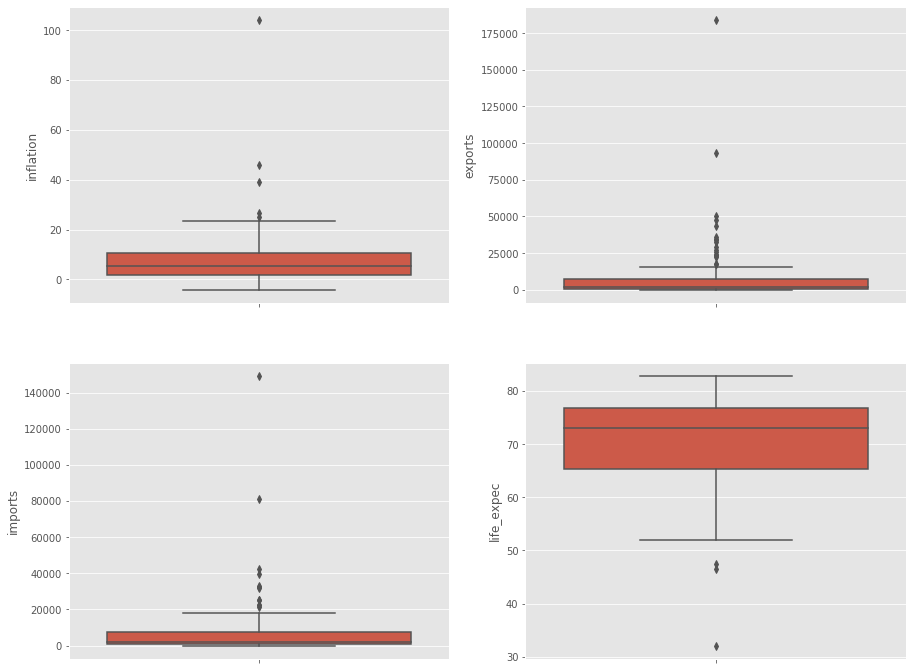

In [108]:
# Let's look at some more outliers.
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(y = 'inflation', data = country)
plt.subplot(2,2,2)
sns.boxplot(y = 'exports', data = country)
plt.subplot(2,2,3)
sns.boxplot(y = 'imports', data = country)
plt.subplot(2,2,4)
sns.boxplot(y = 'life_expec', data = country)

Low outliers in 'life_expec' suggest that these might be the data from the countries in need of aid. So, treating these outliers will lead in loss of very important data. 

Other variables have a few outliers which won't have any significant affect on the analysis. Let's move ahead without changing anything else.

### Step 2: Visualising the data

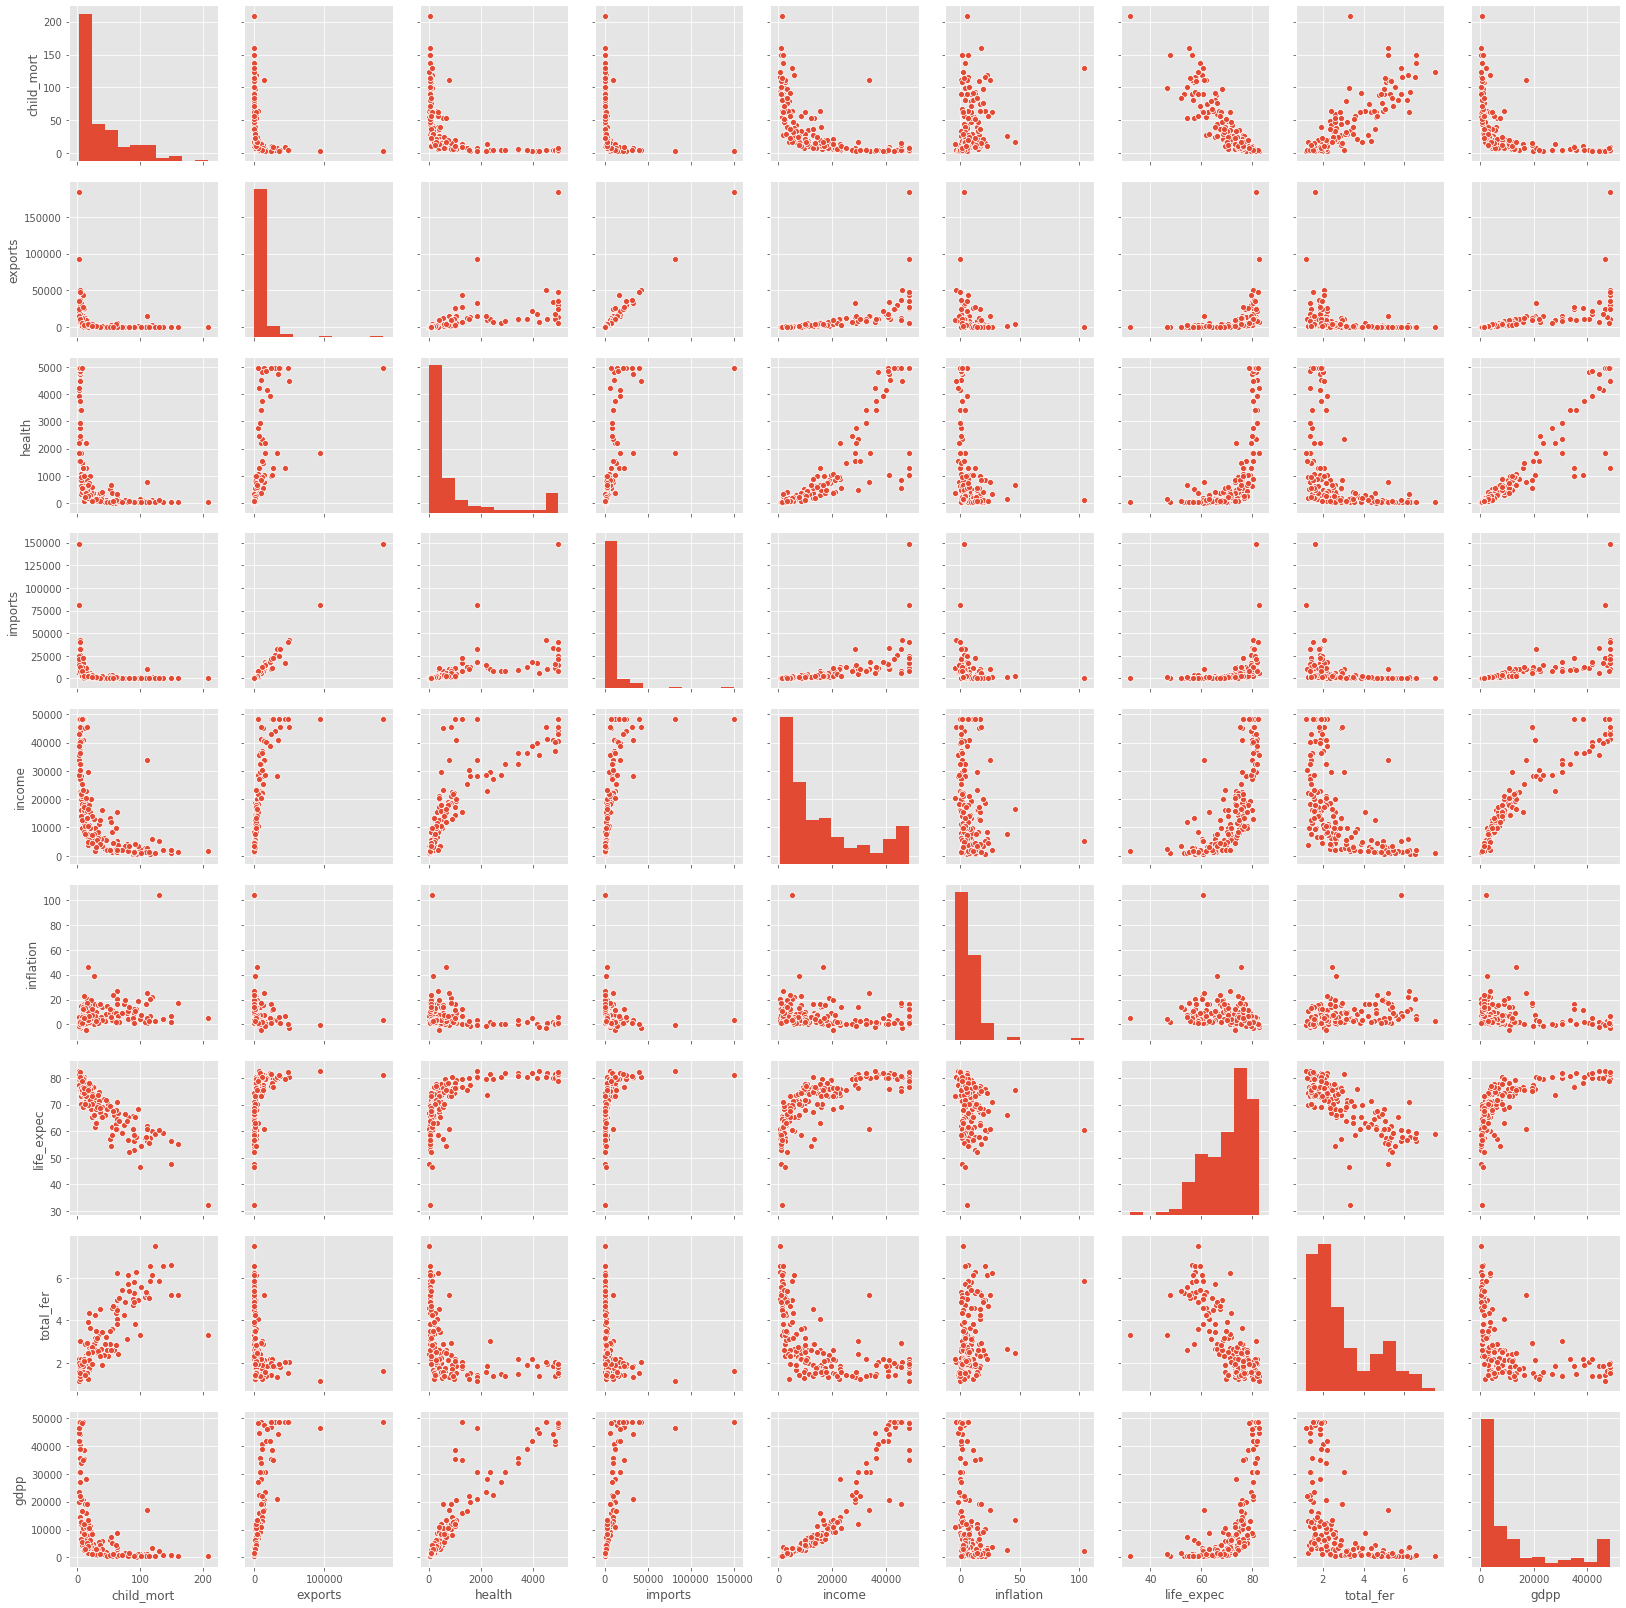

In [109]:
# Visualising numeric variables using pairplot
sns.pairplot(country)
plt.show()

The pair plot shows that there are some strong relationship between variables.

'income' has linear relationships with 'health', 'life_expec' and 'gdpp'

'total_fer' has a linear relationship with 'life_expec'

We now go ahead and check the correlation coefficients of each variable

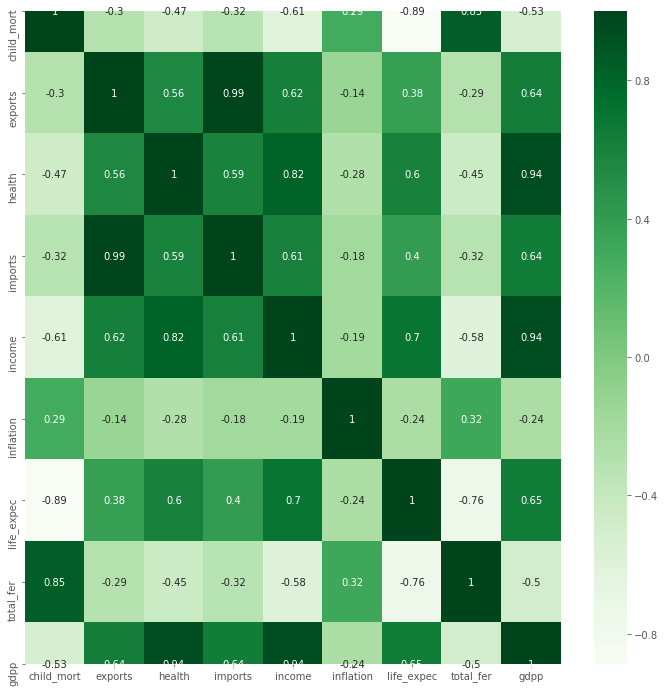

In [110]:
# Let's check the correlation heatmap.
plt.figure(figsize=(12,12))
sns.heatmap(country.corr(), cmap="Greens", annot=True)

We see a lot of high neagative and positive correlation values.

Variable ‘GDP’ is highly correlated to ‘income’, ‘imports’, ‘health’ and ‘exports. Also, it is negatively correlated to ‘child_mort’ and ‘total_fert’.

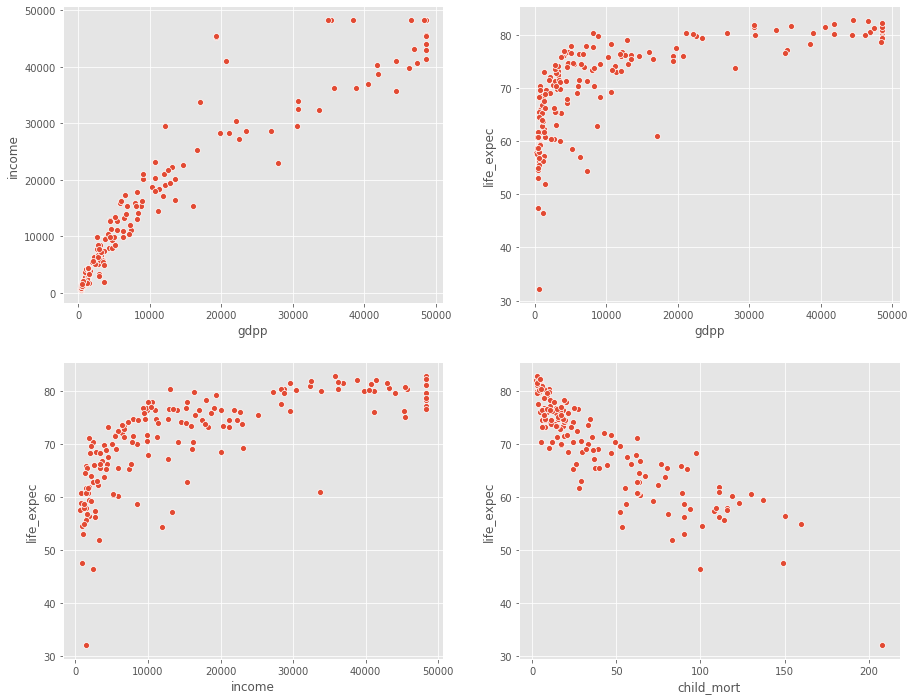

In [111]:
# Let's look at the variables with high correlation coefficients.
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.scatterplot(x="gdpp", y="income", data = country)
plt.subplot(2,2,2)
sns.scatterplot(x = 'gdpp', y = 'life_expec', data = country)
plt.subplot(2,2,3)
sns.scatterplot(x = 'income', y = 'life_expec', data = country)
plt.subplot(2,2,4)
sns.scatterplot(x = 'child_mort', y = 'life_expec', data = country)

### Step 3: Data Preparation

In [112]:
# Let's scale the dataset
scaler = StandardScaler()
# Let's drop the non-numerical olumn 'country'
country_scaled = country.drop('country', axis=1)
country_scaled = scaler.fit_transform(country_scaled)
country_scaled.shape

(167, 9)

In [113]:
country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.629435,-0.432276,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.350191,-0.473489,-0.313677,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.318526,-0.530017,-0.353720,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.291375,-0.588935,-0.345953,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.104331,-0.150685,0.040735,0.227992,-0.601749,0.704258,-0.541946,0.013312


Before we proceed with the cluster modelling, let's check the Hopkins statistic which gives the cluster tendency.

In [114]:
# Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [119]:
hopkins(country_scaled)

0.8882034166146249

We can see that the statistics value is 0.89(>0.7). Hence, it has high cluster tendency.

### Step 4: Modelling

#### a) K-means Clustering

**Finding the optimal number of clusters**

**-->Elbow curve/SSD**

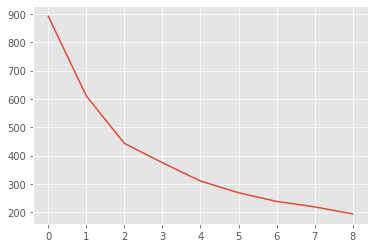

In [120]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(country_scaled)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

Based on the elbow curve/ssd analysis, the cluster count should be around 3.

**-->Silhouette Analysis**

In [132]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters: 
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4740565924223273
For n_clusters=3, the silhouette score is 0.42670053621902027
For n_clusters=4, the silhouette score is 0.4358381018141145
For n_clusters=5, the silhouette score is 0.4408343303250171
For n_clusters=6, the silhouette score is 0.3352376108804344
For n_clusters=7, the silhouette score is 0.3150630888982397
For n_clusters=8, the silhouette score is 0.32354048841558325
For n_clusters=9, the silhouette score is 0.31633243827726487
For n_clusters=10, the silhouette score is 0.2813737742273934


The silhouette scores for n_cluster = 3,4,5 are higher. So, the optimal cluster count is one of these. 

Let's consider all the values and start with k = 4.

In [133]:
# model with k=4
kmeans = KMeans(n_clusters=4, max_iter=100)
kmeans.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [134]:
# looking at all the labels
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 2, 1, 3, 1, 1, 3,
       3, 1, 1, 0, 1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       2, 2, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 2, 3, 3, 2, 2, 1, 1, 3, 1, 2, 2, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3])

In [135]:
# assign the label
country_cm = country
country_cm['cluster_id'] = kmeans.labels_
country_cm.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200,1
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300,1
6,Armenia,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220,1
7,Australia,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.93,48610,2
8,Austria,4.3,24059.70,4966.7010,22418.200,43200.0,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840,1


In [136]:
country_cm['cluster_id'].value_counts()

1    83
3    48
2    34
0     2
Name: cluster_id, dtype: int64

As we can see that the countries are divided into 4 clusters based on different variables.
Although, cluster 0 consists of only 2 countries which doesn't make sense. Model with 5 clusters also leads to this.

Now, let's find out if there's any significant difference between this(k = 4) and a model with k = 3. 

In [184]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [185]:
# assign the label
country_cm = country
country_cm['cluster_id'] = kmeans.labels_
country_cm.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200,2
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300,2
6,Armenia,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220,2
7,Australia,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.93,48610,0
8,Austria,4.3,24059.70,4966.7010,22418.200,43200.0,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840,2


In [163]:
country_cm['cluster_id'].value_counts()

1    88
0    48
2    31
Name: cluster_id, dtype: int64

The model with k = 3 makes more sense and is not very different from the previus model(k = 4) in terms of cluster distribution of the countries. 

So, we shall go ahead with this model(k = 3) and do our analysis on it.

**Cluster Analysis:** Let's analyse the clusters by comparing a few variables like 'gdpp', 'child_mort' and 'income' for different clusters of countries. This will help us differentiate the clusters of developed countries from the clusters of under-developed countries.

In [186]:
# Taking mean of selected variables to compare different clusters
mean_income = pd.DataFrame(country_cm.groupby(['cluster_id']).income.mean())
mean_child_mort = pd.DataFrame(country_cm.groupby(['cluster_id']).child_mort.mean())
mean_gdpp = pd.DataFrame(country_cm.groupby(['cluster_id']).gdpp.mean())
mean_life_expec = pd.DataFrame(country_cm.groupby(['cluster_id']).life_expec.mean())
clus_comp = mean_income.merge(mean_child_mort,on='cluster_id').merge(mean_life_expec,on='cluster_id').merge(mean_gdpp,on='cluster_id')
clus_comp.columns = ['mean_income', 'mean_child_mort', 'mean_life_expec', 'mean_gdpp']
clus_comp = clus_comp.reset_index()
clus_comp

,cluster_id,mean_income,mean_child_mort,mean_life_expec,mean_gdpp
0,0,40555.161290,4.935484,80.506452,40867.419355
1,1,3897.354167,91.610417,59.239583,1909.208333
2,2,13455.568182,20.918182,73.222727,7332.636364


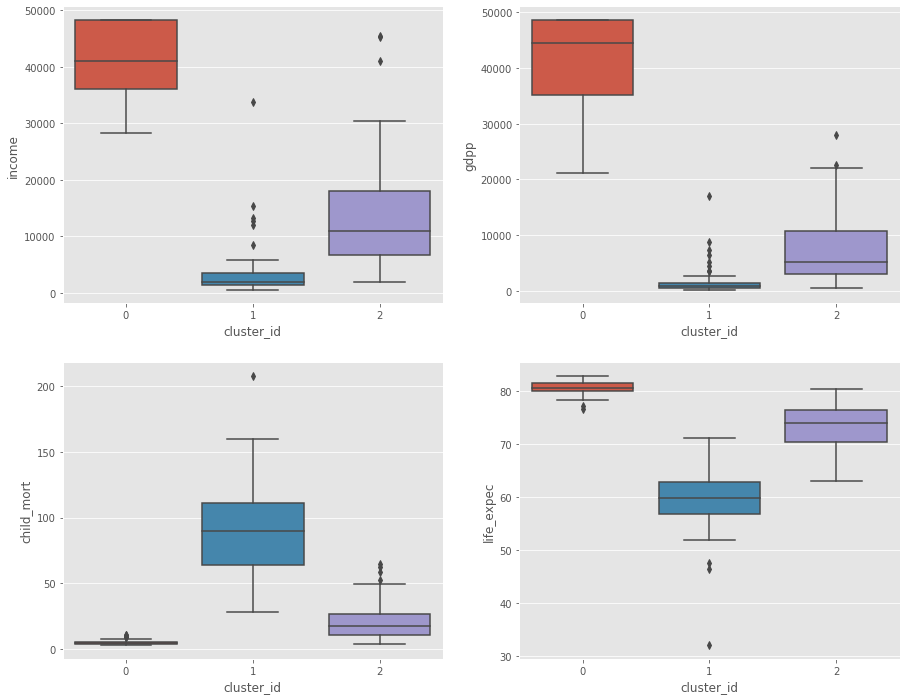

In [187]:
# Let's look at various clusters vs variables
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'cluster_id',y = 'income', data = country_cm)
plt.subplot(2,2,2)
sns.boxplot(x = 'cluster_id',y = 'gdpp', data = country_cm)
plt.subplot(2,2,3)
sns.boxplot(x = 'cluster_id',y = 'child_mort', data = country_cm)
plt.subplot(2,2,4)
sns.boxplot(x = 'cluster_id',y = 'life_expec', data = country_cm)

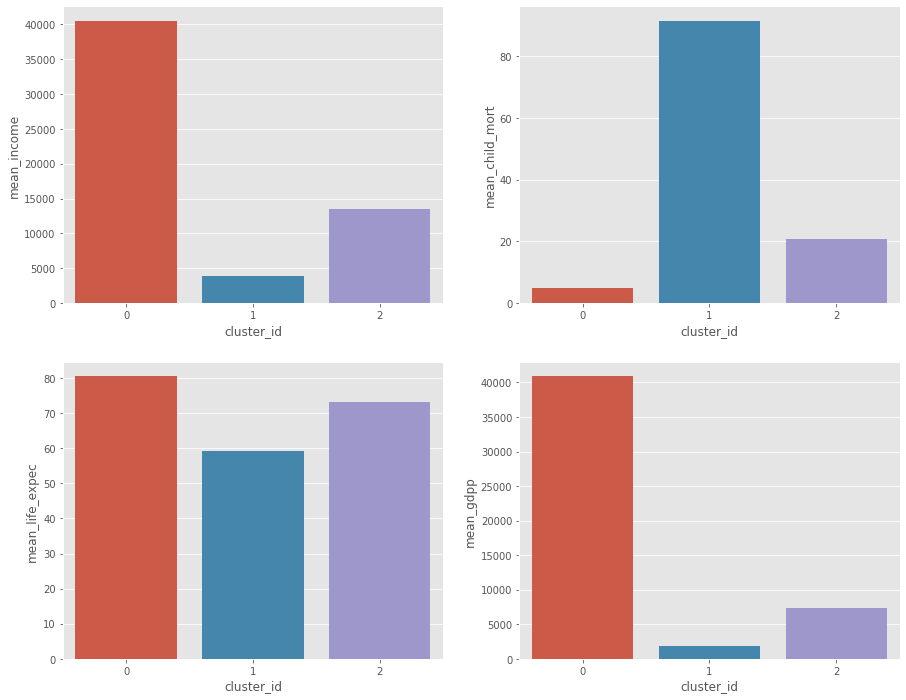

In [188]:
# Let's plot the mean values of different variables for various clusters
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.barplot(x = 'cluster_id', y = 'mean_income', data = clus_comp)
plt.subplot(2,2,2)
sns.barplot(x = 'cluster_id', y = 'mean_child_mort', data = clus_comp)
plt.subplot(2,2,3)
sns.barplot(x = 'cluster_id', y = 'mean_life_expec', data = clus_comp)
plt.subplot(2,2,4)
sns.barplot(x = 'cluster_id', y = 'mean_gdpp', data = clus_comp)

'Cluster-1' represents the underdeveloped countries. It had least mean income, gdp, life_expec and high child_mort. So this is our cluster of interest

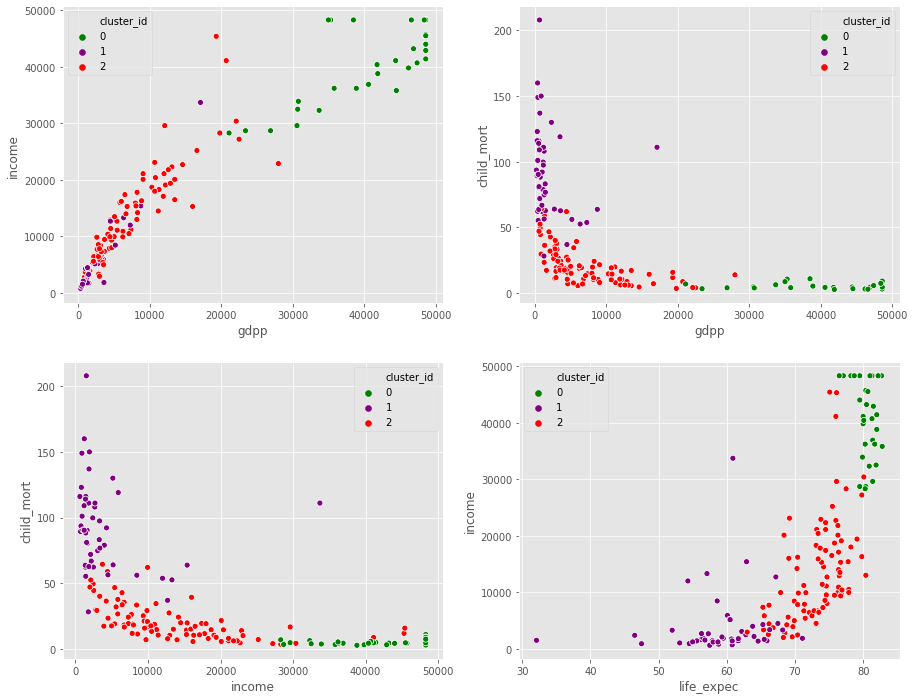

In [189]:
# Looking at some relationships in each cluster
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.scatterplot(x= 'gdpp', y = 'income', hue = 'cluster_id', data = country_cm, palette=['green','purple','red'])
plt.subplot(2,2,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = country_cm, palette=['green','purple','red'])
plt.subplot(2,2,3)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = country_cm, palette=['green','purple','red'])
plt.subplot(2,2,4)
sns.scatterplot(x = 'life_expec', y = 'income', hue = 'cluster_id', data = country_cm, palette=['green','purple','red'])

In [191]:
# Sorting and displaying the countries from the chosen cluster
final_cluster = country_cm[country_cm['cluster_id']==1]
km_cluster = final_cluster.sort_values(['gdpp','child_mort','income'],ascending=[True,False,True]).head(10)
km_cluster

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,1
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,1
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482,1


#### b) Hierarchical Clustering

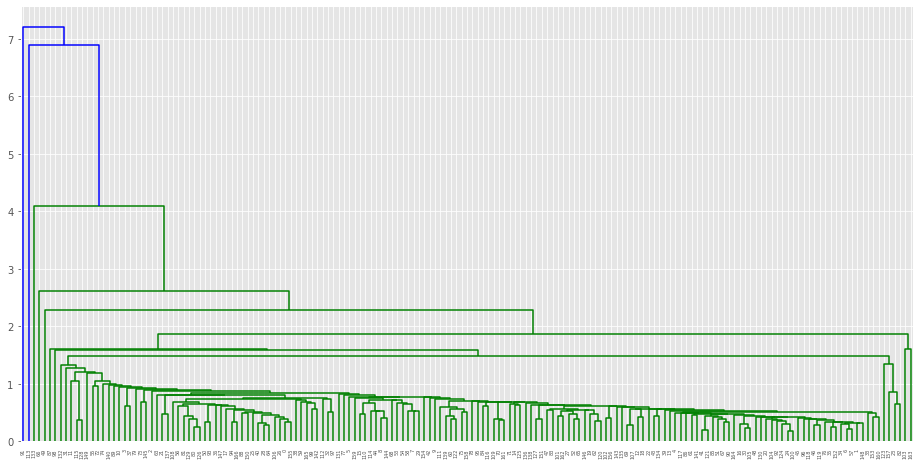

In [192]:
# single linkage
plt.figure(figsize=(16,8))
mergings = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

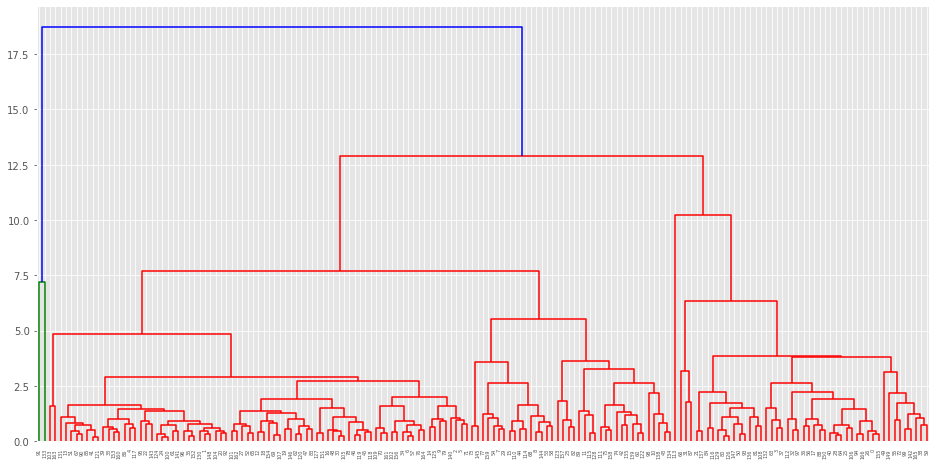

In [193]:
# complete linkage
plt.figure(figsize=(16,8))
mergings = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [194]:
# Moving on with complete linkage and 3 clusters
cluster_label = cut_tree(mergings, n_clusters = 3).reshape(-1, )
cluster_label

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [195]:
# assign cluster labels
country_hm = country
country_hm['cluster_label'] = cluster_label
country_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,1


In [196]:
country_hm['cluster_label'].value_counts()

1    117
0     48
2      2
Name: cluster_label, dtype: int64

The cluster distribution is not very sensible here. Cluster-2 has only two countries in it. A 4-cluster model wouldn't make sense either. So, this hierarchical clustering model with k = 3 or 4 is not very deducive.

However, we can see if the countries in dire need of aid have been moved to a single cluster or not.

In [197]:
# Taking mean of selected variables to compare different clusters
mean_income_hm = pd.DataFrame(country_hm.groupby(['cluster_label']).income.mean())
mean_child_mort_hm = pd.DataFrame(country_hm.groupby(['cluster_label']).child_mort.mean())
mean_gdpp_hm = pd.DataFrame(country_hm.groupby(['cluster_label']).gdpp.mean())
mean_life_expec_hm = pd.DataFrame(country_hm.groupby(['cluster_label']).life_expec.mean())
clus_comp_hm = mean_income_hm.merge(mean_child_mort_hm,on='cluster_label').merge(mean_life_expec_hm,on='cluster_label').merge(mean_gdpp_hm,on='cluster_label')
clus_comp_hm.columns = ['mean_income', 'mean_child_mort', 'mean_life_expec', 'mean_gdpp']
clus_comp_hm = clus_comp_hm.reset_index()
clus_comp_hm

,cluster_label,mean_income,mean_child_mort,mean_life_expec,mean_gdpp
0,0,3897.354167,91.610417,59.239583,1909.208333
1,1,20040.341880,16.993162,75.002564,15529.504274
2,2,48290.000000,2.800000,82.000000,47605.000000


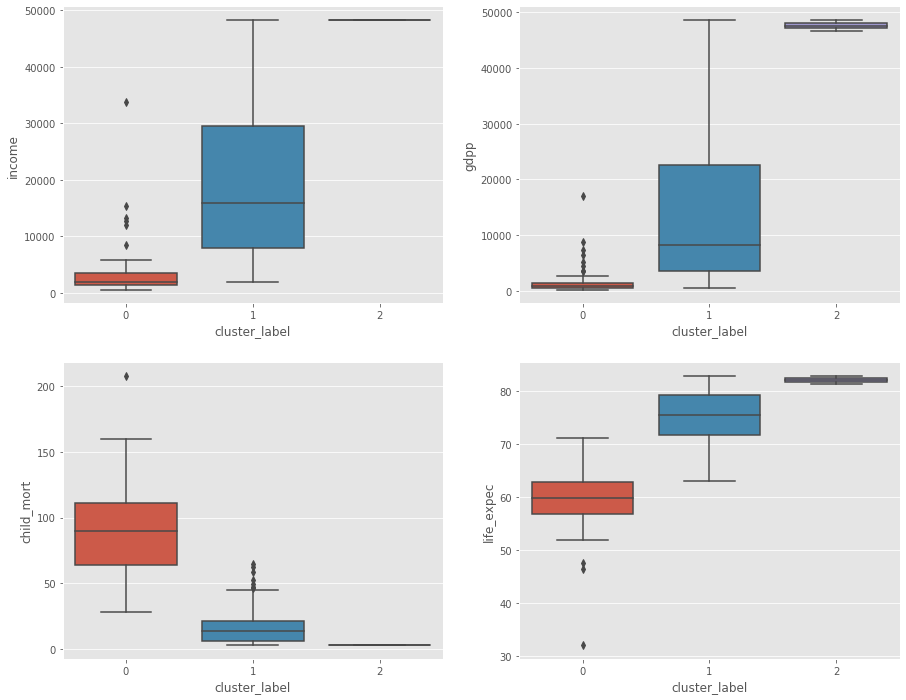

In [198]:
# Let's look at various clusters vs variables
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'cluster_label',y = 'income', data = country_hm)
plt.subplot(2,2,2)
sns.boxplot(x = 'cluster_label',y = 'gdpp', data = country_hm)
plt.subplot(2,2,3)
sns.boxplot(x = 'cluster_label',y = 'child_mort', data = country_hm)
plt.subplot(2,2,4)
sns.boxplot(x = 'cluster_label',y = 'life_expec', data = country_hm)

Cluster-0 looks like the one with poor countries with low 'income' and high 'child_mort'.

Cluster-1 conists of developed/developing countries. Let's see if we can find the desired countries from cluster-0 as we did in k-means model.

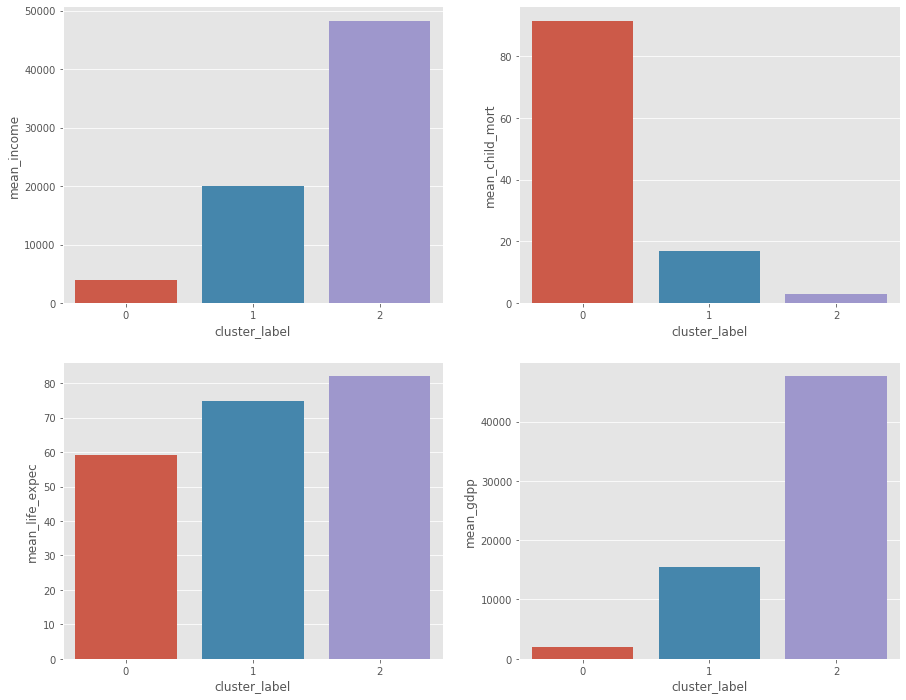

In [199]:
# Let's plot the mean values of different variables for various clusters
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.barplot(x = 'cluster_label', y = 'mean_income', data = clus_comp_hm)
plt.subplot(2,2,2)
sns.barplot(x = 'cluster_label', y = 'mean_child_mort', data = clus_comp_hm)
plt.subplot(2,2,3)
sns.barplot(x = 'cluster_label', y = 'mean_life_expec', data = clus_comp_hm)
plt.subplot(2,2,4)
sns.barplot(x = 'cluster_label', y = 'mean_gdpp', data = clus_comp_hm)

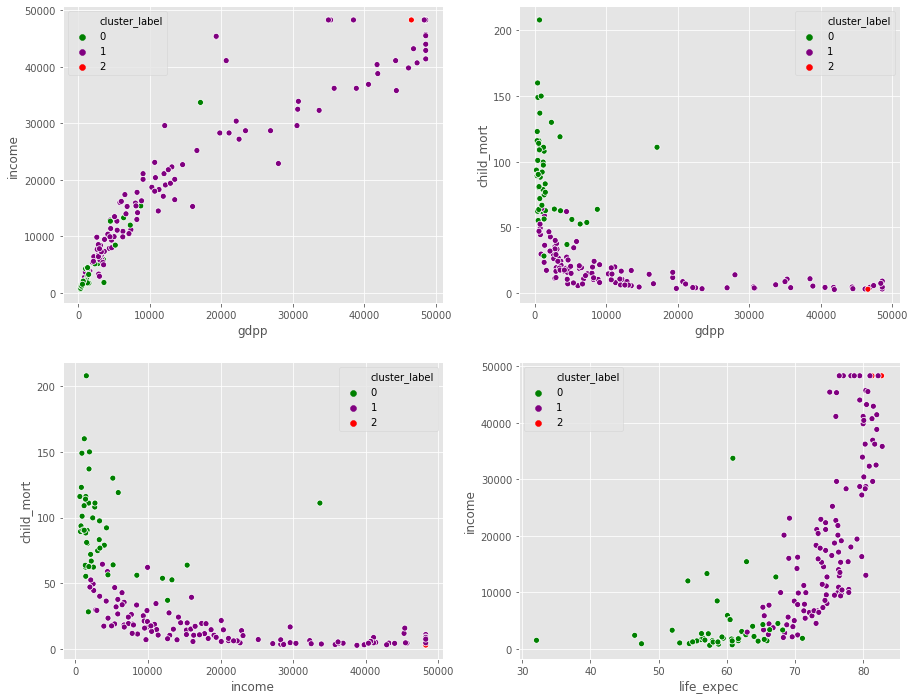

In [200]:
# Looking at some relationships in each cluster
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.scatterplot(x= 'gdpp', y = 'income', hue = 'cluster_label', data = country_hm, palette=['green','purple','red'])
plt.subplot(2,2,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_label', data = country_hm, palette=['green','purple','red'])
plt.subplot(2,2,3)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_label', data = country_hm, palette=['green','purple','red'])
plt.subplot(2,2,4)
sns.scatterplot(x = 'life_expec', y = 'income', hue = 'cluster_label', data = country_hm, palette=['green','purple','red'])

In [201]:
# Sorting and displaying the countries from the chosen cluster
final_cluster_hm = country_hm[country_hm['cluster_label']==0]
hier_cluster=final_cluster_hm.sort_values(['gdpp','child_mort','income'],ascending=[True,False,True]).head(10)
hier_cluster

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,1,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413,1,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,1,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,1,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,1,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482,1,0


We were able to find the countries in direst need of aid through the k-means model as the countries were more logically distributed across the clusters. 

The hierarchical clustering model even though was not distributed well, managed to place the under developed countries into a common cluster.

Here, k means clustering model is preferred while hierarchical model can be used to gain confidence in the obtained result.

In [203]:
# Let's merge the two final clusters(k-means and hierarchical) and displaying the common countries
country_list = pd.merge(km_cluster, hier_cluster, how='inner')
country_list['country']

0                     Burundi
1                     Liberia
2            Congo, Dem. Rep.
3                       Niger
4                Sierra Leone
5                  Madagascar
6                  Mozambique
7    Central African Republic
8                      Malawi
9                     Eritrea
Name: country, dtype: object